In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from utils import visualisation as viz
from utils.dataset import dataset_merge

# Dataset
Données de consommation électrique des ministères en 2014

### Nous avons travaillé sur les bâtiments appartenant aux ministères de :
* l'Interieur
* l'Education
* la Finance
* la Justice

## 1 - Consommation par heure (moyenne de 6 mesures)

In [2]:
df_conso_hour = dataset_merge(["./dataset/ministeres_csv/interieur.csv",
                               "./dataset/ministeres_csv/education.csv",
                               "./dataset/ministeres_csv/justice.csv",
                               "./dataset/ministeres_csv/finance.csv"])

In [3]:
df_conso_hour['RAE'] = df_conso_hour['RAE'].astype(str)
df_conso_hour["Date"] = pd.to_datetime(df_conso_hour["Date"])
df_conso_hour = df_conso_hour[df_conso_hour.Date.dt.year == 2014]
df_conso_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198760 entries, 0 to 2200943
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   RAE     object        
 1   Date    datetime64[ns]
 2   kWh     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.1+ MB


In [4]:
df_conso_hour.sample(10)

,RAE,Date,kWh
660843,30002310654349,2014-03-29 03:00:00,179.000000
661035,30002310654349,2014-06-04 04:00:00,185.500000
786802,30000741467105,2014-07-31 11:00:00,194.833333
1905816,30002510423197,2014-04-24 01:00:00,99.666667
881725,30000731156801,2014-05-28 14:00:00,229.833333
221439,30002450992771,2014-03-19 15:00:00,91.833333
253608,30002510247998,2014-11-17 00:00:00,114.166667
700458,30002211661760,2014-01-10 19:00:00,138.833333
1216813,30000110420652,2014-08-28 14:00:00,212.500000
1817459,30002250219236,2014-03-23 11:00:00,27.666667


>`RAE` Correspond à l'id du bâtiment

## 2 - Information sur les bâtiments

In [5]:
df_label_batiments = pd.read_csv("./dataset/ministeres_csv/type_batiments.csv", sep=",", encoding='utf-8')
df_label_batiments['RAE'] = df_label_batiments['RAE'].astype(str)
df_label_batiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RAE                 250 non-null    object
 1   Ministere (Client)  250 non-null    object
 2   NOM DU SITE         250 non-null    object
 3   Label               250 non-null    object
 4   ADRESSE             247 non-null    object
 5   CODE POSTAL         249 non-null    object
 6   VILLE               250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


### Nous avons manuellement labelisé les bâtiments en fonction de leur nom

<AxesSubplot:title={'center':'Nombre de bâtiment par label'}>

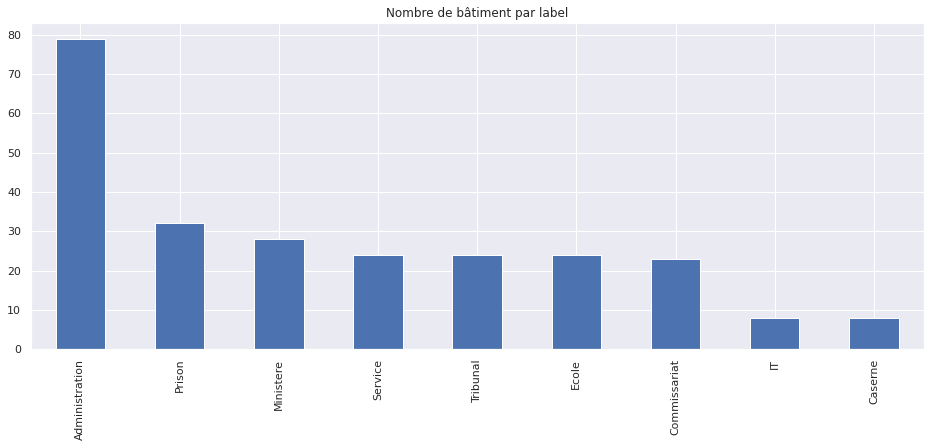

In [6]:
df_label_batiments.Label.value_counts().plot(kind="bar", title="Nombre de bâtiment par label")

> ***ATTENTION:*** Le dataset est déséquilibré

## 3 - Croisement entre les mesures et les infos (via l'id RAE)

In [7]:
df_pivot = df_conso_hour.merge(df_label_batiments, left_on="RAE", right_on="RAE", how="left")
df_pivot.sample(5)

,RAE,Date,kWh,Ministere (Client),NOM DU SITE,Label,ADRESSE,CODE POSTAL,VILLE
945331,30000730148145,2014-11-30 19:00:00,177.333333,EDUCATION,MIN EDU NTLE RECHERCHE ET TECHNOLOGIE,Ministere,21 RUE DESCARTES,75005,PARIS 05
1060065,30002140365010,2014-05-01 09:00:00,92.166667,JUSTICE,TRIBUNAL DE GRANDE INSTANCE,Tribunal,179 AVE JOLIOT CURIE CABINE DE CHANTIER 92000 ...,92000,NANTERRE
1377519,30002250130488,2014-02-04 16:00:00,310.666667,JUSTICE,MIN JUST - PALAIS DE JUSTICE DE BOBIGNY (225-0...,Tribunal,AVENUE PAUL VAILLANT COUTURIER 93000 BOBIGNY,93000,BOBIGNY
1951865,30001421039552,2014-10-25 18:00:00,123.833333,Ministďż˝res ďż˝conomiques et financiers,MEFI - DPMA,Ministere,10 BOULEVARD GASTON DOUMERGUE,44200,NANTES
510478,30002511086807,2014-10-04 23:00:00,65.500000,INTERIEUR,COMMISSARIAT DE NOAILLES,Commissariat,BOULEVARD GARIBALDI,13001,MARSEILLE 01


# Exploration et visualisation 

### Consommation par année

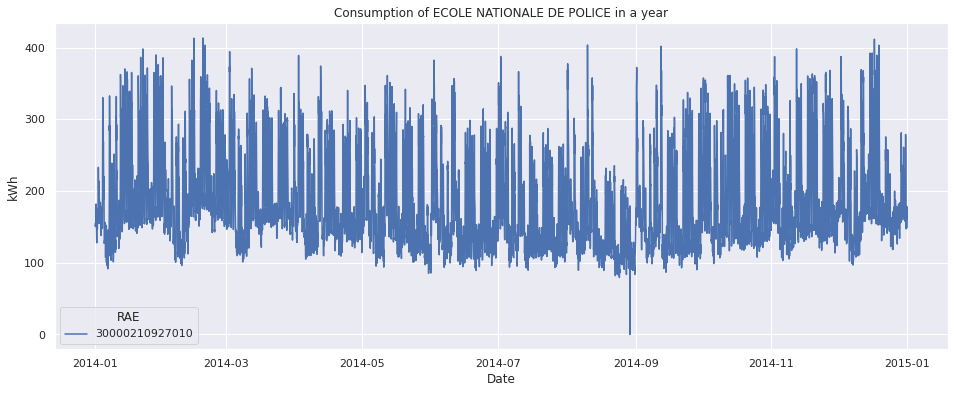

In [8]:
viz.plot_consumption(df_pivot, "30000210927010", "year")

On voit que la consommation diminue légèrement en été mais cela ne va pas nous permettre de différencier les bâtiments.

### Par mois

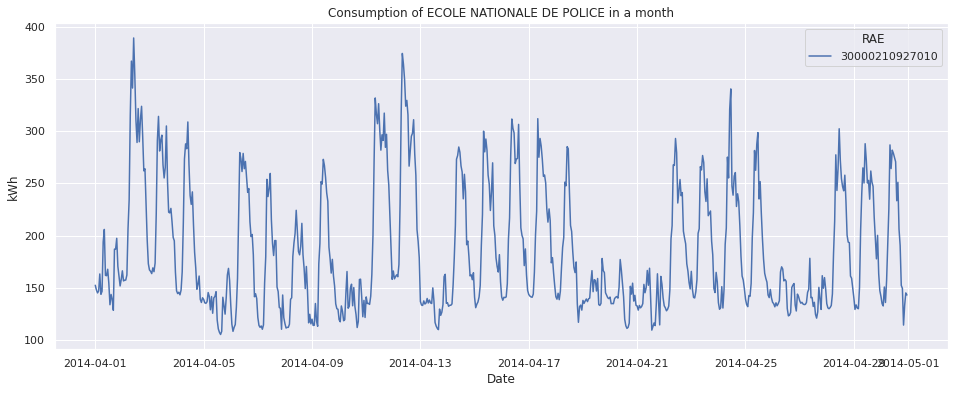

In [9]:
viz.plot_consumption(df_pivot, "30000210927010", "month", 4)

On commence à voir un certain pattern concernant les semaines.

### Par semaine

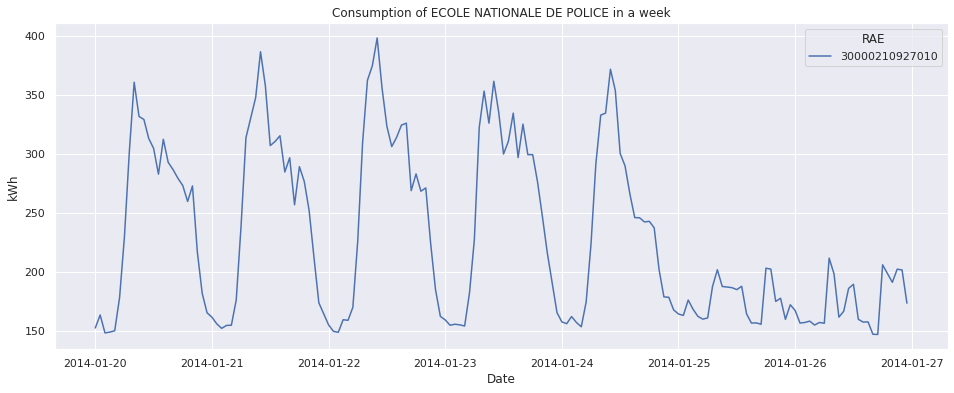

In [10]:
viz.plot_consumption(df_pivot, "30000210927010", "week", 4)

Sans surprise, la consommation est plus faible le week-end.

> __Hypothèse__: Les prisons ou les carsernes n'auront pas cette baisse le week-end, ce qui nous permettra de les différentier.

### Par jour

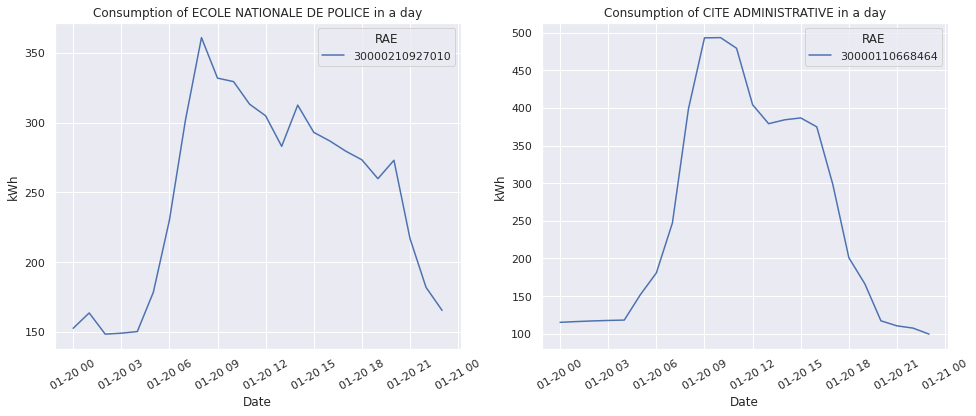

In [11]:
plt.subplot(1, 2, 1)
plt.xticks(rotation=30)
viz.plot_consumption(df_pivot, "30000210927010", "day", 20)


plt.subplot(1, 2, 2)
plt.xticks(rotation=30)
viz.plot_consumption(df_pivot, "30000110668464", "day", 20)

La consommation reste élevé tard le soir dans l'école alors qu'elle diminue à partir de 18h dans la cité administrative.

> __Hypothèse__ : Dans cette école, les étudiants restent travailler le soir ou dorment dans le campus. Cela nous permettra de faire la différence avec les administrations où la consommation devrait baisser plus tôt.

## Semaine type de consommation par label

### Pour les administrations

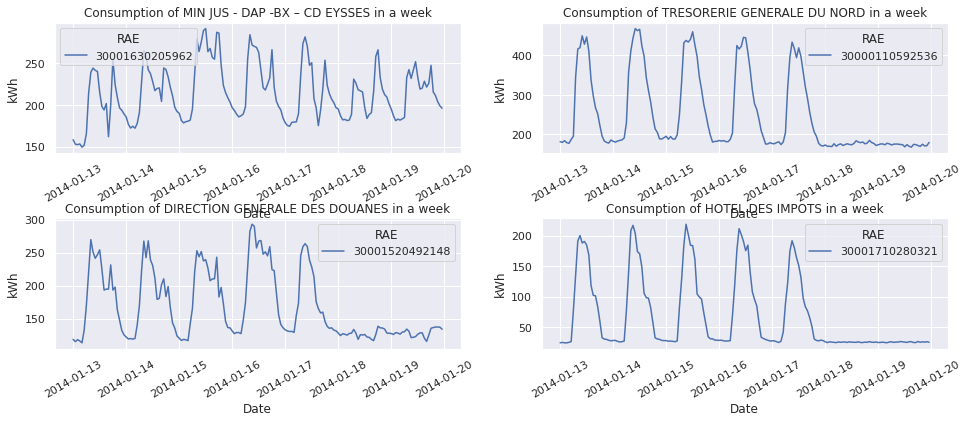

In [12]:
viz.subplot_consumption_by_type(df_label_batiments, df_pivot, "Administration", ("week", 3))

### Pour les prisons

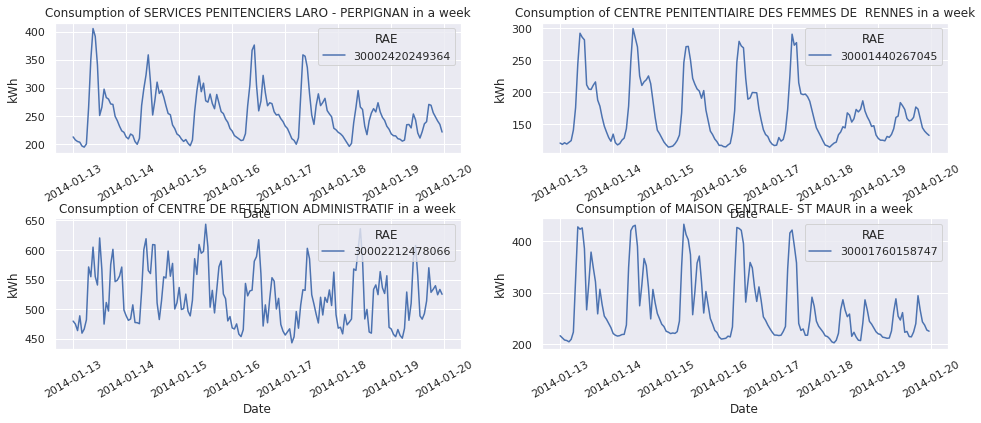

In [13]:
viz.subplot_consumption_by_type(df_label_batiments, df_pivot, "Prison", ("week", 3))

### Pour les écoles

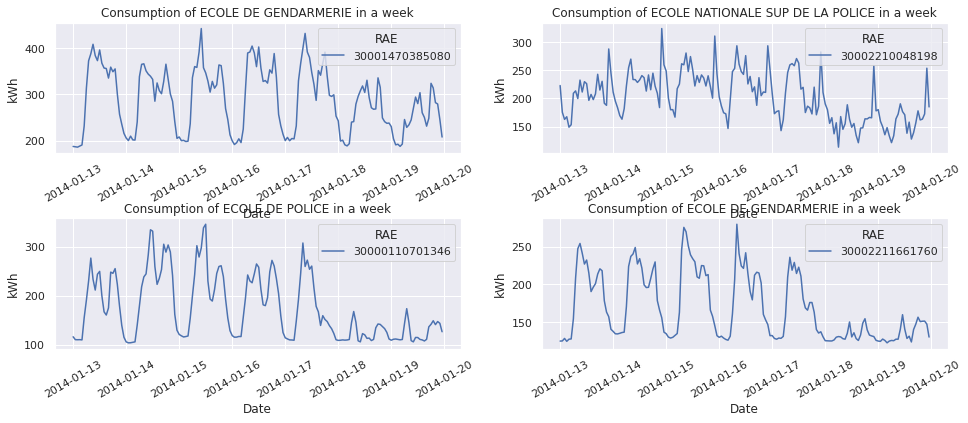

In [14]:
viz.subplot_consumption_by_type(df_label_batiments, df_pivot, "Ecole", ("week", 3))

> __Conclusion__ : Il est possible de différentier certains bâtiments en fonction de leur consommation journalière

# Clustering des consommations journalières
* Pour les entreprises, on peut distinguer 2 types de journées, les jours ouvrés et les jours de repos
* De même en prison/carserne/école, la consommation ne diminue pas drastiquement en soirée
* On devrait donc pouvoir séparer les consommations journalières en plusieurs catégories

In [15]:
# Utilisation de KMeans avec la distance DTW optimisée pour les séries temporelles
from tslearn.clustering import TimeSeriesKMeans

df_pivot = df_pivot.sort_values(by="Date", ascending=True)

In [16]:
def get_daily_consumption(df=df_pivot, RAEs=df_pivot.RAE.unique()):
    """
    Transforme la liste de consommation par heure d'un batiment,
    en une matrice de 365x24 de consommation par heure, par jour.
    La consommation journalière est normalisée.
    """
    
    res = []
    for i in tqdm(range(len(RAEs))):
    
        df = df_pivot[df_pivot.RAE == RAEs[i]]
        # Suppr heure en plus du au changement d'heure
        df = df.drop_duplicates(subset=["Date"])
        # Ajouter heure manquante (duplication mesure 1am)
        new_entry = df[(df.Date.dt.dayofyear == 89) & (df.Date.dt.hour == 1)]
        new_entry["Date"] = new_entry["Date"] + timedelta(hours=1)
        df = df.append(new_entry, ignore_index=True).sort_values(by="Date", ascending=True)

        # On normalise les consommations intraday par la conso maximale de la journée
        res.extend([
            df[df.Date.dt.dayofyear == d].kWh.values /
            (df[df.Date.dt.dayofyear == d].kWh.max() if df[df.Date.dt.dayofyear == d].kWh.max() > 0 else 1)
            for d in df.Date.dt.dayofyear.unique()
        ])
    
    return np.vstack(res)

### Séparation non-supervisée des jours en 2 catégories et visualisation sur les 20 premiers jours de l'année.

100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


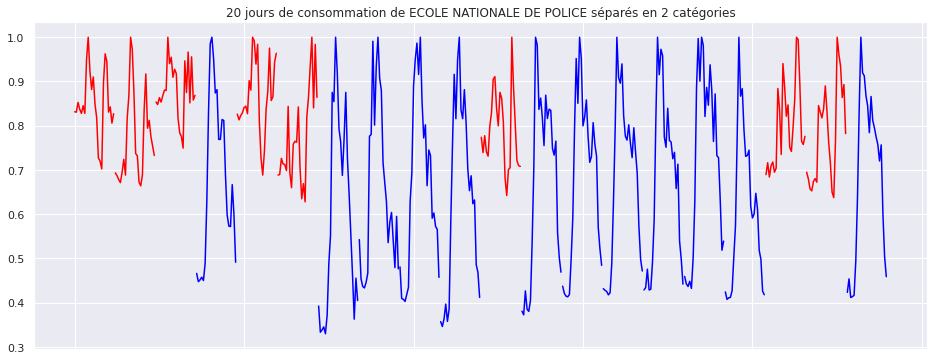

In [17]:
daily_cons = get_daily_consumption(RAEs=["30000210927010"])
model = TimeSeriesKMeans(n_clusters=2, metric="dtw",
                             max_iter=100, random_state=42)
model.fit(daily_cons)

rae_name = [df_label_batiments[df_label_batiments.RAE == "30000210927010"]["NOM DU SITE"].values[0]]
viz.plot_day_clustering(daily_cons, rae_name, model.labels_)

Même dans cette exemple où la consommation n'est pas plate les jours de repos, notre modèle détecte bien :
* les jours de repos en rouge
* les jours ouvrés en bleu

### Vérification du fonctionnement pour plusieurs batiments différents

100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


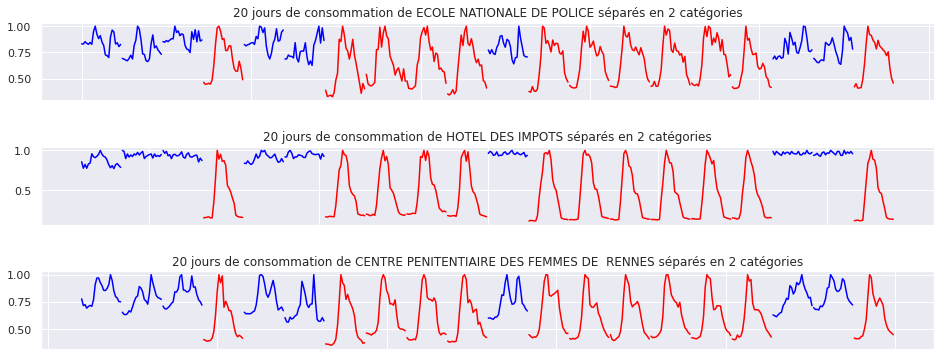

In [18]:
raes = ["30000210927010", "30001710280321", "30001440267045"]

daily_cons = get_daily_consumption(RAEs=raes)
model = TimeSeriesKMeans(n_clusters=2, metric="dtw",
                             max_iter=100, random_state=42)
model.fit(daily_cons)

rae_name = [df_label_batiments[df_label_batiments.RAE == rae]["NOM DU SITE"].values[0] for rae in raes]
viz.plot_day_clustering(daily_cons, rae_name, model.labels_)

Les jours de repos sont détectés au même moment alors que leur forme est différente !

### Est-il possible de detecter la différence entre une journée de travail qui s'arrête en fin d'après midi et une consommation qui continue en soirée ?

On demande à KMeans de séparer nos journées en 3 clusters

100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


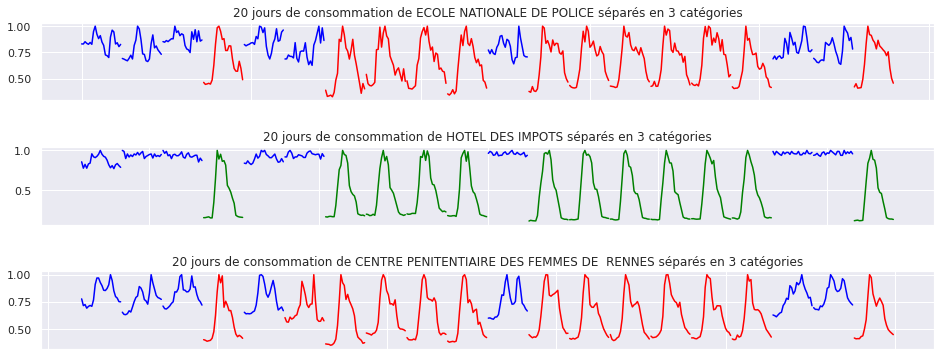

In [19]:
raes = ["30000210927010", "30001710280321", "30001440267045"]

daily_cons = get_daily_consumption(RAEs=raes)
model = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                             max_iter=100, random_state=42)
model.fit(daily_cons)

rae_name = [df_label_batiments[df_label_batiments.RAE == rae]["NOM DU SITE"].values[0] for rae in raes]
viz.plot_day_clustering(daily_cons, rae_name, model.labels_)

Le modèle fait la différence entre :
* Une journée de repos en bleu
* Une journée travail classique en vert
* Une journée compléte en rouge

__Fun fact__: Pas de différence entre une prison et une école/campus où les élèves restent le soir

### Est-il intéressant de faire plus de catégories

On demande à KMeans de faire 4 clusters

100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


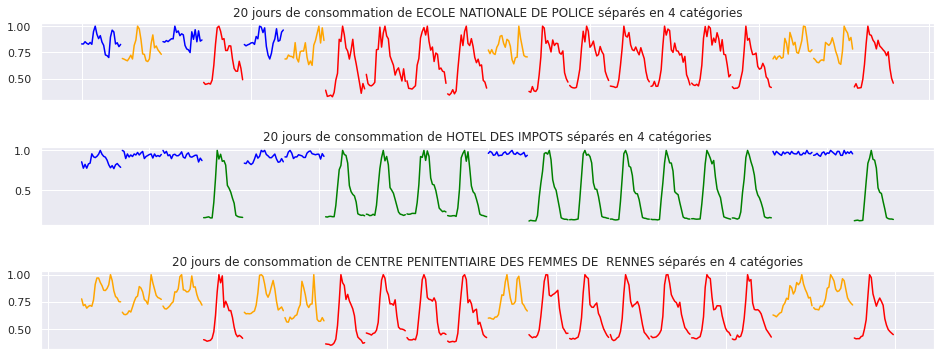

In [20]:
raes = ["30000210927010", "30001710280321", "30001440267045"]

daily_cons = get_daily_consumption(RAEs=raes)
model = TimeSeriesKMeans(n_clusters=4, metric="dtw",
                             max_iter=100, random_state=42)
model.fit(daily_cons)

rae_name = [df_label_batiments[df_label_batiments.RAE == rae]["NOM DU SITE"].values[0] for rae in raes]
viz.plot_day_clustering(daily_cons, rae_name, model.labels_)

Sur ces 3 exemples, cela ne semble pas pertinent

# Application du clustering sur tous les bâtiments

In [21]:
# daily_cons = get_daily_consumption(df_pivot)
# daily_cons.dump("./processed/daily_cons.np")
daily_cons = np.load("./processed/daily_cons.np", allow_pickle=True)

In [22]:
# model = TimeSeriesKMeans(n_clusters=3, metric="dtw", n_jobs=2, max_iter=100, random_state=42)
# model.fit(daily_cons) ~30 min
# model.labels_.dump("./processed/daily_cons_kmeans3.np")
day_labels = np.load("./processed/daily_cons_kmeans3.np", allow_pickle=True)

### Visualisation du clustering sur les 7 premiers bâtiments

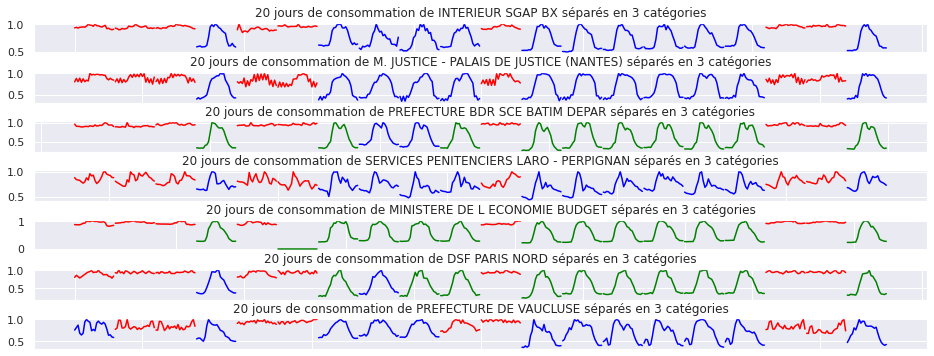

In [23]:
rae_names = [df_label_batiments[df_label_batiments.RAE == rae]["NOM DU SITE"].values[0]
            for rae in df_pivot.RAE.unique()[:7]]

viz.plot_day_clustering(daily_cons, rae_names, day_labels)

Bien qu'un peu moins parfait que sur nos 3 exemples, le clustering semble fonctionner dans l'ensemble.

### Pour chaque batiment, on a donc 365 numéros de clusters correspondant au type de jours

In [24]:
X = day_labels.reshape(-1, 365)
X[:4]

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [25]:
y = np.array([df_label_batiments[df_label_batiments.RAE == rae].Label.values[0] for rae in df_pivot.RAE.unique()])
y[:4]

array(['Administration', 'Tribunal', 'Service', 'Prison'], dtype='<U14')

> __Hypothèse__ : A partir des types de jours, on peut catégoriser un bâtiment

## Visualisation

In [26]:
from sklearn.manifold import TSNE
from umap import UMAP

Text(0.5, 1.0, 'UMAP(2) transformation')

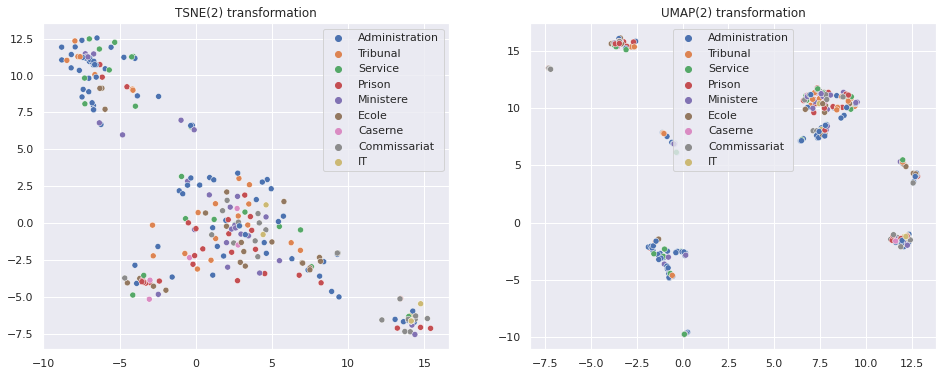

In [27]:
tsne = TSNE(2)
X_tsne = tsne.fit_transform(X)

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, legend=True).set_title("TSNE(2) transformation")

plt.subplot(1, 2, 2)
umap = UMAP(n_neighbors=3)
X_umap = umap.fit_transform(X)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, legend=True).set_title("UMAP(2) transformation")

Pas de séparation parfaite mais certains regroupements se forment :
* Les administrations avec les services et les tribunaux
* Les écoles avec les casernes et les prisons

## Clustering par bâtiments

In [28]:
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans

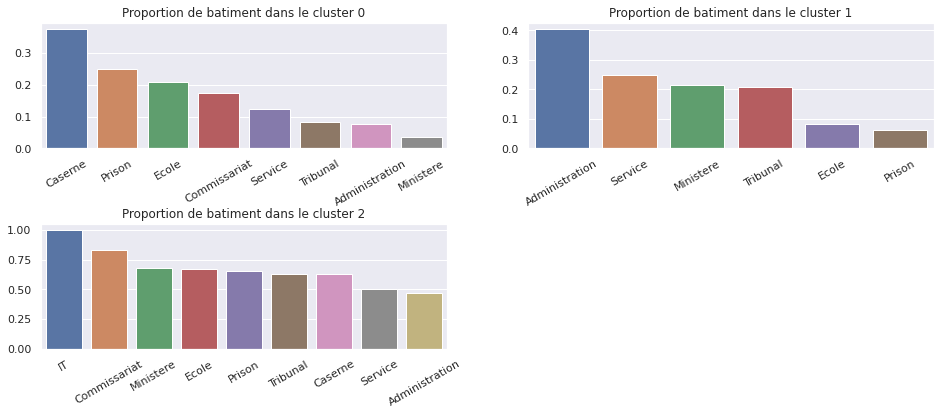

In [29]:
model_h = HDBSCAN(min_cluster_size=28)
clusters_h = model_h.fit_predict(X_umap)
nb_clusters = len(np.unique(clusters_h))

plt.subplots_adjust(hspace=0.6)
for i in range(1, nb_clusters):
    plt.subplot(nb_clusters//2, 2, i)
    viz.plot_types_in_cluster(clusters_h, y, np.unique(clusters_h)[i], df_label_batiments)
    plt.xticks(rotation=30)

Découpage intéressant mais on voit que le cluster 1, qui n'est pas très différencié, représente 60% des bâtiments

## Nous avons donc essayer avec 4 types de jours

In [37]:
# model = TimeSeriesKMeans(n_clusters=4, metric="dtw", n_jobs=2, max_iter=100, random_state=42)
# model.fit(daily_cons) ~50 min
# model.labels_.dump("./processed/daily_cons_kmeans4.np")
day_labels = np.load("./processed/daily_cons_kmeans4.np", allow_pickle=True)

Text(0.5, 1.0, 'UMAP(2) transformation')

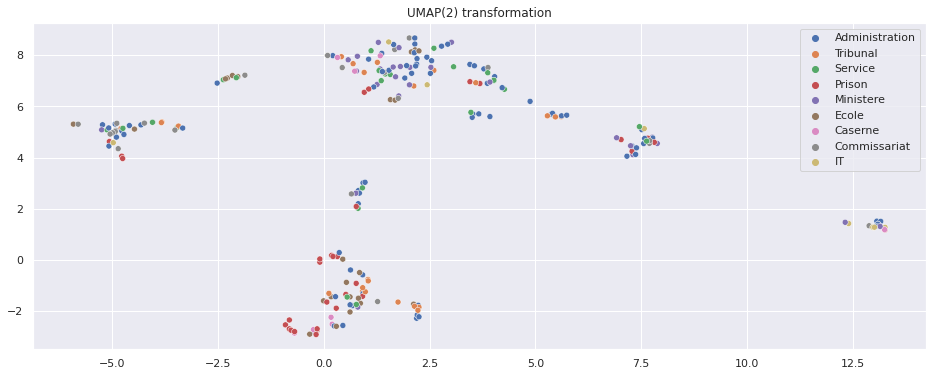

In [38]:
X = day_labels.reshape(-1, 365)
umap = UMAP(n_neighbors=3)
X_umap = umap.fit_transform(X)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, legend=True).set_title("UMAP(2) transformation")

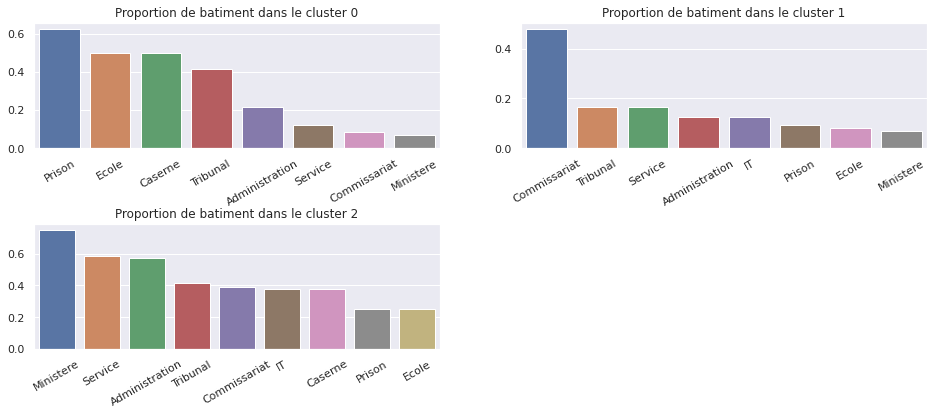

In [40]:
model_h = HDBSCAN(min_cluster_size=22)
clusters_h = model_h.fit_predict(X_umap)
nb_clusters = len(np.unique(clusters_h))

plt.subplots_adjust(hspace=0.6)
for i in range(nb_clusters - 1):
    plt.subplot(nb_clusters//2, 2, i+1)
    viz.plot_types_in_cluster(clusters_h, y, i, df_label_batiments)
    plt.xticks(rotation=30)

## Et avec 5 types de jours

In [33]:
# model = TimeSeriesKMeans(n_clusters=5, metric="dtw", n_jobs=2, max_iter=100, random_state=42)
# model.fit(daily_cons) ~1h30 min
# model.labels_.dump("./processed/daily_cons_kmeans5.np")
day_labels = np.load("./processed/daily_cons_kmeans5.np", allow_pickle=True)

Text(0.5, 1.0, 'UMAP(2) transformation')

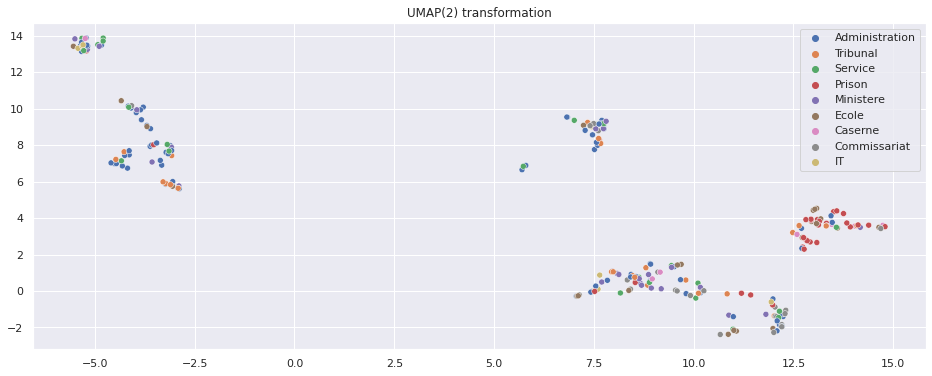

In [34]:
X = day_labels.reshape(-1, 365)
umap = UMAP(n_neighbors=3)
X_umap = umap.fit_transform(X)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, legend=True).set_title("UMAP(2) transformation")

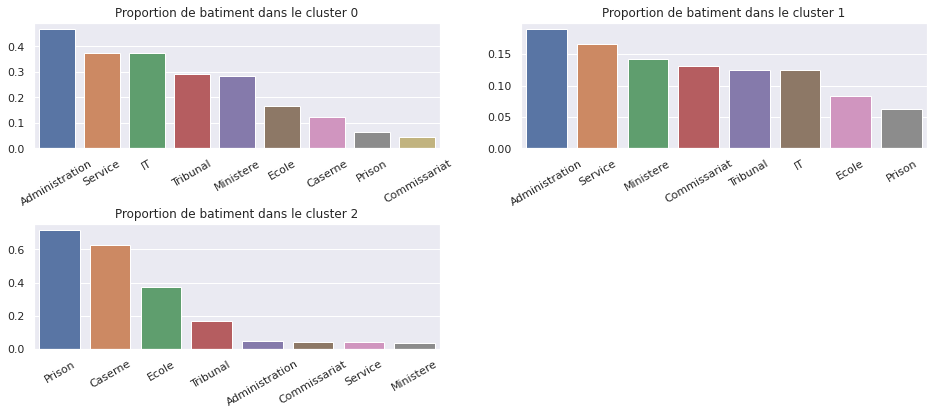

In [35]:
model_h = HDBSCAN(min_cluster_size=30)
clusters_h = model_h.fit_predict(X_umap)
nb_clusters = len(np.unique(clusters_h))

plt.subplots_adjust(hspace=0.6)
for i in range(nb_clusters - 1):
    plt.subplot(nb_clusters//2, 2, i+1)
    viz.plot_types_in_cluster(clusters_h, y, i, df_label_batiments)
    plt.xticks(rotation=30)

* On voit que le cluster 0 et 1 sont mieux différenciés qu'avec 3 ou 4 types
* Le cluster 2 représente les bâtiments dont on ne peut pas tirer de conclusion mais ils ne représente que 15% des bâtiments environ.

> Il semble que rajouter des types de jours précise un peu les clusters mais cela augmente grandement le temps de calcul

## Conclusion

* Notre modèle permet de différencier les bâtiments en fonction de leur usage pour des exemples simples.
* Il ne permet cependant pas de faire la différence entre les bâtiments dont la consommation se ressemble (ex: Prison et Caserne)

### Pour aller plus loin

* Analyser les données à l'échelle 10min pour voir les variations à l'intérieur d'une journée (comme la pause midi)
* Avoir une labélisation plus professionnelle
* Avoir des bâtiments plus variés, comme des restaurants ou des bars